# Machine Learning - Ex 1
---

Before anything, I will import libraries relevant to the assignments.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data1 = np.loadtxt("./data/ex1data1.txt", delimiter=',')

Each problem will be named: "Problem 1,...,Problem n". Lets go!

## Problem 1: Warm up

- Create a 5x5 identity matrix

In [3]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

## Problem 2: Computing Cost Linear Regression

### Problem 2.1: Plotting the data

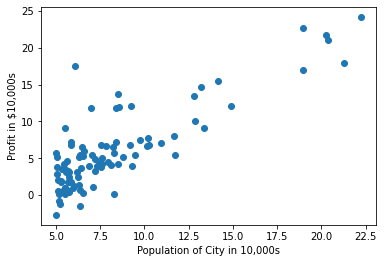

In [4]:
X = data1[:,0]
y = data1[:,1]

plt.figure()
plt.scatter(X,y) #using np
#plt.scatter(df1[0],df1[1]) #using pd
plt.ylabel("Profit in $10,000s")
plt.xlabel('Population of City in 10,000s')
plt.show()

### Problem 2.2: Gradient Descent

Objective of LR is to minimize cost function $$𝐽(ø)={1\over{2𝑚}}∑(ℎ_ø(𝑥^{(i)})−𝑦^{(𝑖)})^2$$

where the hypothesis $h_ø(x)$ is given by the linear model: $$h_ø(x)=ø_0+ø_1x_1+ø_2x_2+...+ø_nx_n = ø^Tx$$

First, we need to append $x_0=1$ vector to our vector X, create a thetha vector and set alpha and iterations. Set n (rows) and m (cols) for X train

In [5]:
m = len(X)
n = np.ndim(X)+1
X_train = np.column_stack((np.ones(m),X))
theta = np.zeros(n)
iters = 1500
alpha = 0.01

Now we can compute cost function $J(ø)$

In [6]:
def computeCost(X, y, theta):
    J = np.dot((np.dot(X,theta)-y),(np.dot(X,theta)-y))/(2*len(X))
    return J

Compute $J(ø)$ with theta = 0

In [7]:
print(computeCost(X_train, y, theta))

32.07273387745567


Compute $J(ø)$ with theta = (-1,2)

In [8]:
print(computeCost(X_train, y,[-1,2]))

54.24245508201236


Now, we have to minimize $ø_0$ and $ø_1$ simultaneously, to be able to min the cost function $J(ø)$

$$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}{(h_{\theta}(x^{(i)}) - y^{(i)}) x^{(i)}_j}$$

In [9]:
def gradientDescent(X, y, theta, alpha, iters):
    J_history=np.zeros(iters)
    for i in range(iters):
        theta = theta - np.dot((alpha/len(X)),np.dot((np.dot(X,theta)-y),X))
        J_history[i] = computeCost(X, y, theta)
    return theta, J_history

In [10]:
theta_opt, J_history = gradientDescent(X_train, y, theta, alpha, iters)
# print("theta computed gradient descent:\n%f,\n%f", theta_opt[0],theta_opt[1])
print("theta computed gradient descent:",(theta_opt))

theta computed gradient descent: [-3.63029144  1.16636235]


Now, lets plot this new theta_opt in the scatter plot with $ℎ_ø(𝑥)=ø_0+ø_1𝑥_1$

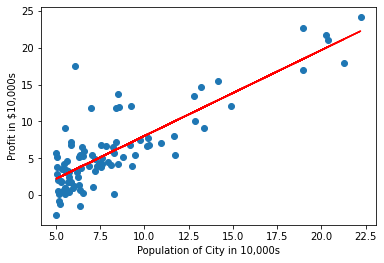

In [11]:
h = np.dot(X_train,theta_opt)
plt.figure()
plt.scatter(X,y)
plt.plot(X,h, color="red")
plt.ylabel("Profit in $10,000s")
plt.xlabel('Population of City in 10,000s')
plt.show()

We can also see the cost function * iterations plot, where cost function is minimized as iters get larger

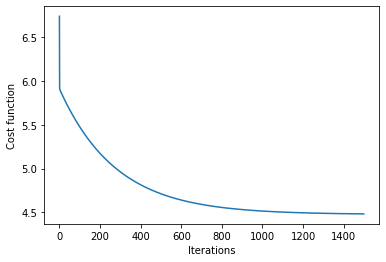

In [12]:
plt.figure()
plt.plot(range(iters), J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost function')
plt.show()

Now we can Predict values for population sizes of 35,000 and 70,000

In [13]:
X_35k=3.5
X_70k=7.0
h_35k = theta_opt[0]+np.dot(theta_opt[1],X_35k)
h_70k = theta_opt[0]+np.dot(theta_opt[1],X_70k)
print("For population 35k and 70k, we predict a profit of \n",h_35k,h_70k)

For population 35k and 70k, we predict a profit of 
 0.4519767867701767 4.534245012944714


Things to keep in minds 
- np.dot is matrix multiplication
- np.multuply is element-wise multiplication
- $*$ is elemnt-wise multiplication on arrays and vectors but matrix multiplication on matrices

## Problem 3: Linear Regression with Multiple Variables 

First, we load the new data and set set the variables X, y

In [106]:
data2 = np.loadtxt("./data/ex1data2.txt", delimiter=',')
X = data2[:,[0,1]]
y = data2[:,2]

### Problem 3.1: Feature Normalization

Looking at X and y, they both have different scales. We want to mean normalise them so we can get a better gradient descent minimization of the cost function $J(ø)$

In [283]:
def featureNormalize(X):
    mean = np.mean(X, axis = 0)
    std = np.std(X, axis = 0, ddof = 1)
    X_norm = (X-mean)/std
    return X_norm, mean, std

X_norm, mean, std = featureNormalize(X)

### Problem 3.2: Gradient Descent Multi

To get strted we set the variables n,m, theta, iters, alpha, and X_train (just X_norm appended to $x_0=1$

In [272]:
n = np.ndim(X)+1
m = len(X)
theta = np.zeros(n)
iters = 400
alpha = 0.1
X_train = np.column_stack((np.ones(m),X_norm))

Now, we follow the steps and define compute cost and gradient descent.

In [273]:
def computeCostMulti(X, y, theta):
    J = np.dot((np.dot(X,theta)-y),(np.dot(X,theta)-y))/(2*len(X))
    return J

In [274]:
def gradientDescentMulti(X, y, theta, alpha, iters):
    J_history=np.zeros(iters)
    for i in range(iters):
        theta = theta - ((alpha/len(X)) * np.dot(X.T,(np.dot(X,theta)-y)))
        J_history[i] = computeCost(X, y, theta)
    return theta, J_history

In [275]:
theta_opt, J_history = gradientDescentMulti(X_train, y, theta, alpha, iters)
print(theta_opt)

[340412.65957447 110631.04895815  -6649.47295013]


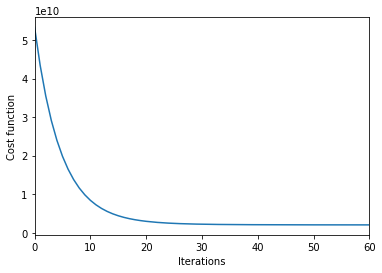

In [276]:
plt.figure()
plt.plot(range(iters), J_history)
plt.xlim(0,60)
plt.xlabel('Iterations')
plt.ylabel('Cost function')
plt.show()

After getting the optimal theta with feature normalization, we can make predictions for our $h(ø)$

We start first by setting the prediciton variables as X_predict and normalizing those variables using our function featureNormalize

In [291]:
X_predict = [1650,3]
X_predict_norm = (X_predict-mean)/std

Then, we must append $x_0=1$ so that we can make our prediction with the normalized value

In [293]:
X_predict_norm_final = np.hstack((np.ones(1),X_predict_norm))
h_pred = np.dot(theta_opt,X_predict_norm_final)
print("Estimate the price of a 1650 sq-ft, 3 br house",h_pred)

Estimate the price of a 1650 sq-ft, 3 br house 293081.46462227573


### Optional

check convergance rate to minimum $J(ø)$ with different alphas

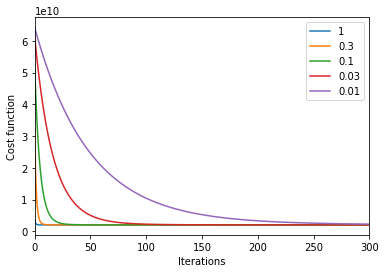

In [294]:
alphas = [1, 0.3, 0.1, 0.03, 0.01]
plt.figure()
for a in alphas:
    theta_opt, J_history = gradientDescentMulti(X_train, y, theta, a, iters)
    plt.plot(range(iters), J_history, label=str(a))
plt.xlim(0,300)
plt.xlabel('Iterations')
plt.ylabel('Cost function')
plt.legend()
plt.show()

### Problem 3.3: Normal Eq

Different from Gradient Descent, there are no iterations here and we know the closed-form solution for thetha_opt by using this equation:
$$\theta =(X^T X)^{-1} X^T y$$

In [305]:
def normalEq(X,y):
    X_train = np.column_stack((np.ones(m),X)) #add x_0=1 to normalized X array
    theta = np.zeros(np.ndim(X_train)) #set theta with same variables as columns in X_train
    theta_opt = np.dot(np.dot(np.linalg.pinv(np.dot(X_train.T,X_train)),X_train.T),y)
    return theta_opt

In [306]:
theta_opt_NEQ = normalEq(X,y)

In [307]:
theta_opt_NEQ

array([89597.90954361,   139.21067402, -8738.01911255])

In [308]:
X_predict_NEQ = [1,1650,3]
h_pred = np.dot(theta_opt_NEQ,X_predict_NEQ)
print("Estimate the price of a 1650 sq-ft, 3 br house",h_pred)

Estimate the price of a 1650 sq-ft, 3 br house 293081.46433498926
